# 不定积分和定积分

1. SciPy 的数值积分（scipy.integrate）
SciPy 提供了多种数值积分方法，包括单变量积分、多重积分和常微分方程求解。
    quad: 单变量定积分
        scipy.integrate.quad(func, a, b, args=(), full_output=0, ...)
            func：被积函数（Python 函数，接受一个输入变量）。
            a：积分下限（可以是 -np.inf 或 np.inf）。
            b：积分上限。
            args：额外参数，传递给 func（如 args=(a, b)）。
        返回：
            y：积分结果。
            abserr：绝对误差估计。
        1. 无限区间积分
            result, error = quad(lambda x: np.exp(-x), 0, np.inf)
        2. 处理奇异点（不连续点）
            如果被积函数在区间内有奇异点（如 1/sqrt(x) 在 x=0），需指定 points 参数：
            result, error = quad(lambda x: 1/np.sqrt(x), 0, 1, points=[0])
        3. 提高精度（控制误差）
            通过 epsabs 和 epsrel 调整绝对/相对误差容忍度：
            result, error = quad(lambda x: np.exp(-x**2), -np.inf, np.inf, epsabs=1e-10, epsrel=1e-10)
        
    dblquad, tplquad: 二重、三重积分
        1. 二重积分
            scipy.integrate.dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.5e-8, epsrel=1.5e-8)
                func(y, x)：被积函数，变量顺序必须是 (y, x)（即先对 y 积分，再对 x 积分）。
                a, b：外层变量 x 的积分下限和上限。
                gfun(x)：内层变量 y 的下限（可以是函数）。
                hfun(x)：内层变量 y 的上限（可以是函数）。
                args：额外参数传递给 func。
        例如：
            def integrand(y, x):
                return x * y
            result, error = dblquad(integrand, 0, 1, lambda x: 0, lambda x: 1)
        示例 2（变限积分）：
            result, error = dblquad(lambda y, x: x * y, 0, 1, lambda x: 0, lambda x: x)
        2. tplquad（三重积分）
            scipy.integrate.tplquad(func, a, b, gfun, hfun, qfun, rfun, args=(), ...)
                func(z, y, x)：被积函数，变量顺序必须是 (z, y, x)（先对 z 积分，再对 y，最后对 x）。
                a, b：最外层变量 x 的积分限。
                gfun(x), hfun(x)：中间变量 y 的下限和上限（函数）。
                qfun(x, y), rfun(x, y)：最内层变量 z 的下限和上限（函数）。
            例一：
                def integrand(z, y, x):
                    return x * y * z
                result, error = tplquad(integrand, 
                        0, 1,                               # x 的积分限
                        lambda x: 0, lambda x: 1,           # y 的积分限
                        lambda x, y: 0, lambda x, y: 1)     # z 的积分限


    odeint: 常微分方程求解
    odeint 是 SciPy 中用于求解常微分方程(ODE)系统的函数，它实现了 LSODA 算法，能够自动在刚性(stiff)和非刚性(non-stiff)问题之间切换。
        scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ...)
            func: 定义微分方程的函数
            y0: 初始条件
            t: 时间点序列
            args: 传递给func的额外参数

2. sympy.integrate() 是 SymPy 库中的函数，用于计算 符号积分（解析积分），包括不定积分、定积分、多重积分等。它返回积分的精确表达式（如果存在闭合解），而不是数值近似。
    1. 不定积分（求原函数）integrate(f, x)
        f 是被积函数（表达式）。
        x 是积分变量。
    2. 定积分（计算区间积分）integrate(f, (x, a, b))
        a 是积分下限
        b 是积分上限。
    3. 多重积分 SymPy 可以计算 二重积分、三重积分 等，只需嵌套积分变量和区间。integrate(x * y, (x, 0, y), (y, 0, 1))

3. 高级功能
    1. 积分特殊函数
    SymPy 可以处理 指数、对数、三角函数、特殊函数（如 Gamma、Bessel） 等的积分。
        计算 ∫ e⁻ˣ dx：result = integrate(exp(-x), x)
        计算 ∫ sin(x) dx：result = integrate(sin(x), x)
    2. 处理无解析解的积分
    如果积分没有闭合解，SymPy 会返回 未计算的积分表达式 或使用特殊函数表示。
    result = integrate(exp(-x**2), x)
    print(result)  # 输出: √π·erf(x)/2  其中 erf(x) 是误差函数。
    3. 分段函数积分
    计算 ∫₋₁¹ |x| dx：result = integrate(Abs(x), (x, -1, 1))         print(result)  # 输出: 1

In [1]:
from sympy import *

x = symbols('x')
inte = integrate(sin(2*x),(x,0,pi))
inte2 = integrate(sin(x)/x,(x,0,oo))
print(inte)
print(inte2)

0
pi/2


# odeint: 常微分方程求解
scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ...)
            func: 定义微分方程的函数
            y0: 初始条件
            t: 时间点序列
            args: 传递给func的额外参数
示例1: 简单一阶ODE
求解方程: dy/dt = -y, y(0) = 1

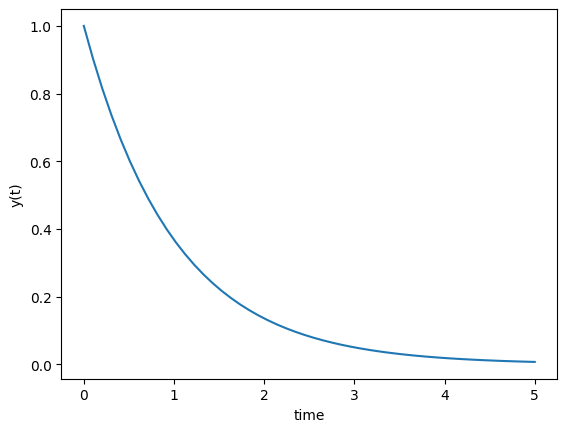

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def model(y, t):
    dydt = -y
    return dydt
# 初始条件
y0 = 1
# 时间点
t = np.linspace(0, 5)
# 求解ODE
y = odeint(model, y0, t)
# 绘制结果
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

示例2: 带参数的ODE
求解方程: dy/dt = -k*y, y(0) = 5

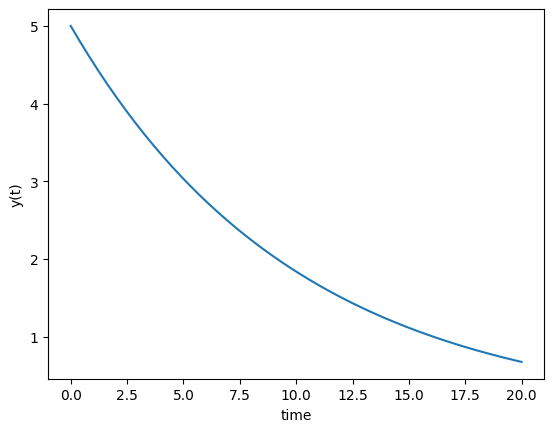

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def model(y, t, k):
    dydt = -k * y
    return dydt

y0 = 5
t = np.linspace(0, 20)
k = 0.1
y = odeint(model, y0, t, args=(k,))

plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

示例3: 二阶ODE转换为一阶系统
求解方程: d²y/dt² + 2*dy/dt + 2*y = 0
首先转换为两个一阶方程:
    dy/dt = v
    dv/dt = -2*v - 2*y

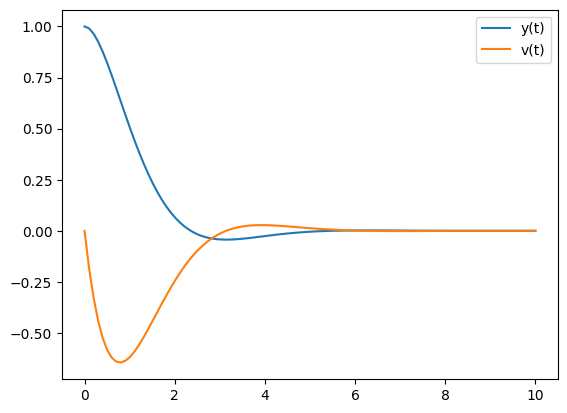

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def model(z, t):
    y, v = z
    dzdt = [v, -2*v - 2*y]
    return dzdt

z0 = [1, 0]  # y(0)=1, y'(0)=0
t = np.linspace(0, 10, 100)
z = odeint(model, z0, t)

y = z[:, 0]
v = z[:, 1]

plt.plot(t, y, label='y(t)')
plt.plot(t, v, label="v(t)")
plt.legend()
plt.show()